**Author : Dharmin Solanki (ID: 201701198)**

Mounting the Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Question-1**: Plot θ vs L(θ)

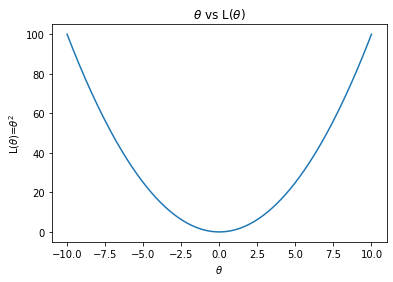

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
#-----------------------------------------------------------------------------------------------------------------------------

x = np.arange(-10.0,10.1,0.1)
y = np.square(x)

plt.plot(x,y)
plt.xlabel(r'$\theta$')
plt.ylabel(r'L($\theta$)=$\theta^2$')
plt.title(r'$\theta$ vs L($\theta$)')
plt.show()

**Question-2**: Plot θ1, θ2 vs L(θ1, θ2)

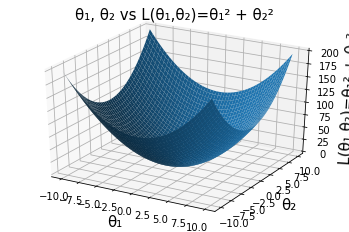

In [0]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
#-----------------------------------------------------------------------------------------------------------------------------

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
theta1,theta2 = np.meshgrid(x,y)
z = theta1**2 + theta2**2

ax.plot_surface(theta1,theta2,z)
ax.set_xlabel('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}', fontsize='15')
ax.set_ylabel('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO}', fontsize='15')
ax.set_zlabel('L(\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE},\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO})=\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}\N{SUPERSCRIPT TWO} + \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO}\N{SUPERSCRIPT TWO}', fontsize='15')
plt.title('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}, \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO} vs L(\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE},\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO})=\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}\N{SUPERSCRIPT TWO} + \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT TWO}\N{SUPERSCRIPT TWO}', fontsize='15')
plt.show()

**Question-3**: Plot θ0, θ1 vs L(θ0, θ1)

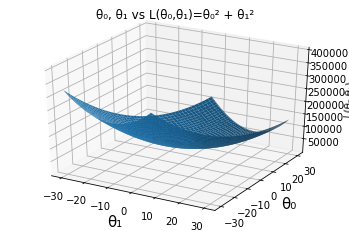


[θ₀ θ₁] = [ 23.700000000000763   -6.899999999999672 ]

Minimum L(θ) = 1572.7835058203148


In [2]:
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#---------------------------------------------------------------------------------------------------------------------------------------------------

df = pd.read_excel('H:\Semester 6\IE 406 - 4.0 - Machine Learning\IE 406 - Course Syllabus\Labs- Winter 20\Lab 1\DataForProblem1.xlsx')

x = np.array(df['x'])
y = np.array(df['y'])

x =x- np.mean(x)
x =x/np.std(x)

theta_0 = np.arange(-30.0,30.1,0.1)
theta_1 = np.arange(-30.0,30.1,0.1)

theta0,theta1 = np.meshgrid(theta_0,theta_1)

L = np.zeros(theta0.shape)
for i in range(len(theta_1)):
  for j in range(len(theta_0)):
    L[i,j] = np.sum((y- (theta0[i,j]+theta1[i,j]*x))** 2)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta1, theta0, L)
ax.set_xlabel('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}', fontsize='15')
ax.set_ylabel('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO}', fontsize='15')
ax.set_zlabel('L(\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO},\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE})')
plt.title('\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO}, \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE} vs L(\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO},\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE})=\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO}\N{SUPERSCRIPT TWO} + \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}\N{SUPERSCRIPT TWO}')
plt.show()

print()
print('[\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO} \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}] = [',theta0[np.unravel_index(np.argmin(L),L.shape)], ' ' ,theta1[np.unravel_index(np.argmin(L),L.shape)], ']')
print()
print('Minimum L(\N{GREEK SMALL LETTER THETA}) =', L.min())

**Question-4**: Applying Pseudo Invers (Least Square Approaximation) approach to get values of θ0, θ1.

In [1]:
import numpy as np
import pandas as pd
#-----------------------------------------------------------------------------------------------------------------------------

df = pd.read_excel('H:\Semester 6\IE 406 - 4.0 - Machine Learning\IE 406 - Course Syllabus\Labs- Winter 20\Lab 1\DataForProblem1.xlsx')

x = np.array(df['x'])
y = np.array(df['y'])

x =x- np.mean(x)
x =x/np.std(x)

temp = np.ones((len(x),1))
X = np.c_[temp,x]
Xtx=np.matmul(X.T,X)
Xtx_inv=np.linalg.inv(Xtx)
temp2 = np.matmul(Xtx_inv, X.T)
theta = np.matmul(temp2, y)

print('[\N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ZERO} \N{GREEK SMALL LETTER THETA}\N{SUBSCRIPT ONE}] =', theta)

[θ₀ θ₁] = [23.71808511 -6.86699545]


**Question-5_a**: Calculate the value of L(θ) using - 
(i) The θ vector obtained by Pseudo Inverse and 
(ii) Assuming a random θ vector.

In [4]:
import numpy as np
#-----------------------------------------------------------------------------------------------------------------------------

df = pd.read_excel('H:\Semester 6\IE 406 - 4.0 - Machine Learning\IE 406 - Course Syllabus\Labs- Winter 20\Lab 1\DataForProblem1.xlsx')

x = np.array(df['x'])
y = np.array(df['y'])

x = x- np.mean(x)
x = x/np.std(x)

temp = np.ones((len(x),1))
X = np.c_[temp,x]
Xtx = np.matmul(X.T,X)
Xtx_inv = np.linalg.inv(Xtx)
temp2 = np.matmul(Xtx_inv, X.T)
theta = np.matmul(temp2, y)

temp3 = y-np.matmul(X,theta)
L_LS = np.sum(temp3**2)
print('L(\N{GREEK SMALL LETTER THETA}) =', L_LS, '      <---------- Pseudo Inverse Appraoch')
print()

theta_asm = [-8, 5]
#theta_asm = [23.71808511, -6.86699545]
temp4 = y-np.matmul(X,theta_asm)
L_rndm = np.sum(temp4**2)
print('L(\N{GREEK SMALL LETTER THETA}) =', L_rndm, '      <---------- Assuming a random \N{GREEK SMALL LETTER THETA}')

L(θ) = 1572.6503668922921       <---------- Pseudo Inverse Appraoch

L(θ) = 109377.72572042006       <---------- Assuming a random θ


**Question-5_b**: Why is the Pseudo Inverse also called as Least Square method ??

**Answer-5_b**: The Pseudo Inverse approach is called as Least Square method because when we talk about Linear Regression, both the methods do the same job i.e. finding the coefficients of parameters that minimize the squared error.